## Setup the environment by importing required libraries

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_of_Warsaw').text 
soup = BeautifulSoup(source, 'lxml')

In [3]:
csv_file = open('Warsaw.csv', 'w', encoding="utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [4]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [5]:
csv_file.close()

In [6]:
warsaw_raw = pd.read_csv('Warsaw.csv')

In [7]:
warsaw_raw.shape

(33, 1)

In [8]:
warsaw_raw

,Neighbourhood
0,Boernerowo
1,Bródno
2,Czyste
3,Falenica
4,"Frascati, Warsaw"
5,"Gocław, Warsaw"
6,Gocławek
7,Grochów
8,"Henryków, Warsaw"
9,Kabaty


In [9]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = warsaw_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Warsaw, Poland'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [11]:
waw_data = warsaw_raw
waw_data['Latitude'] = lat
waw_data['Longitude'] = lng

In [12]:
waw_data.head()

,Neighbourhood,Latitude,Longitude
0,Boernerowo,52.26343,20.90139
1,Bródno,52.28612,21.03228
2,Czyste,52.22867,20.97193
3,Falenica,52.15590,21.20303
4,"Frascati, Warsaw",52.22655,21.02636


## Setup FourSquare credentials.

In [13]:
CLIENT_ID = 'RFDYSOUNE1Y4QARY1DVIYPZREFDOW5BNPOZ5S1ZOOKZ1YV0B' # your Foursquare ID
CLIENT_SECRET = 'V5N0O1VL1LR4YBAFOPD4PCIM0QK2F2Q0FLH21ETR43DSPBZG' # your Foursquare Secret
ACCESS_TOKEN = 'DNODP1YCMKGOBNRQEEDV1UPQH3TFJX5BDWZRKIL1ILM4XUIM' # your FourSquare Access Token
VERSION = '20210220'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RFDYSOUNE1Y4QARY1DVIYPZREFDOW5BNPOZ5S1ZOOKZ1YV0B
CLIENT_SECRET:V5N0O1VL1LR4YBAFOPD4PCIM0QK2F2Q0FLH21ETR43DSPBZG


## Latitude and Longitude of Warsaw.

In [15]:
from geopy.geocoders import Nominatim

address = 'Warsaw, Poland'

geolocator = Nominatim(user_agent="https://www.capstoneproject.com")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Warsaw are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Warsaw are 52.2319581, 21.0067249.


## Let's plot map of Warsaw using latitude and longitude values.

In [17]:
waw_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(waw_data['Latitude'], waw_data['Longitude'], waw_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(waw_map)  
    
waw_map

## In the following call we will create a function which will extract the category from the FourSquare vanues. Later we will apply FourSquare API in all the neighbourhoods on Warsaw.

In [18]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
explore_df_list = []

for i, nhood_name in enumerate(waw_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = waw_data.loc[i, 'Neighbourhood']
        nhood_lat = waw_data.loc[i, 'Latitude']
        nhood_lng = waw_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

<ipython-input-19-8c0cd1befd20>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby = json_normalize(results) # Flatten JSON


## Now we will create a dataframe for performing clustering

In [20]:
explore_waw = pd.DataFrame([item for item in explore_df_list])
explore_waw.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_waw.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Boernerowo,52.26343,20.90139,Sąsiedzi,Bistro,52.260210,20.896449
1,Boernerowo,52.26343,20.90139,Łośka,Pub,52.259585,20.897942
2,Boernerowo,52.26343,20.90139,Lotnisko Bemowo/Babice,Airport,52.267143,20.914725
3,Boernerowo,52.26343,20.90139,Sala WNBA,Basketball Court,52.261312,20.902499
4,Boernerowo,52.26343,20.90139,Stare Bemowo,Bus Station,52.258883,20.897487



## Now we will perform one-hot encoding to analyze neighbourhoods of Warsaw.

In [21]:
waw_1hot = pd.get_dummies(explore_waw[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
waw_1hot['Neighbourhood'] = explore_waw['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [waw_1hot.columns[-1]] + waw_1hot.columns[:-1].values.tolist()
waw_1hot = waw_1hot[fixed_columns]

waw_1hot.head()

,Neighbourhood,Airport,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Bakery,Bar,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Bulgarian Restaurant,Burger Joint,Bus Line,Bus Station,Business Center,Cafeteria,Café,Cantonese Restaurant,Castle,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Library,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flight School,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Music Venue,Neighborhood,New American Restaurant,Nightclub,Opera House,Other Great Outdoors,Outlet Store,Palace,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Pub,Racetrack,Radio Station,Ramen Restaurant,Recreation Center,Restaurant,River,Road,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Soccer Field,Soccer Stadium,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Tiki Bar,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Boernerowo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Boernerowo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Boernerowo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Boernerowo,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## In the following step we will agregate the venues by neighbourhoods and later we will create a function to return most common venues.

In [23]:
waw_grouped = waw_1hot.groupby('Neighbourhood').mean().reset_index()
waw_grouped.head()

,Neighbourhood,Airport,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Bakery,Bar,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Bulgarian Restaurant,Burger Joint,Bus Line,Bus Station,Business Center,Cafeteria,Café,Cantonese Restaurant,Castle,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Library,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flight School,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Music Venue,Neighborhood,New American Restaurant,Nightclub,Opera House,Other Great Outdoors,Outlet Store,Palace,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Pub,Racetrack,Radio Station,Ramen Restaurant,Recreation Center,Restaurant,River,Road,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Soccer Field,Soccer Stadium,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Tiki Bar,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Boernerowo,0.125,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.125,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,Bródno,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.066667,0.0,0.000000,0.000000,0.0,0.066667,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [24]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

## Now we will create a new dataframe to get the top 10 venues.

In [25]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = waw_grouped['Neighbourhood']

for ind in np.arange(waw_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(waw_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boernerowo,Bus Station,Airport,Park,Bistro,Basketball Court,Flight School,Pub,Dessert Shop,Event Space,Flea Market
1,Bródno,Bus Station,Pool,Sushi Restaurant,Pharmacy,Park,Dessert Shop,Falafel Restaurant,Burger Joint,Market,Liquor Store
2,Czyste,Japanese Restaurant,Sushi Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place,Lounge,Breakfast Spot,Sandwich Place,Dive Bar,Donut Shop
3,Falenica,Coffee Shop,Indian Restaurant,Italian Restaurant,Train Station,Stadium,Liquor Store,Sushi Restaurant,Yoga Studio,Eastern European Restaurant,Field
4,"Frascati, Warsaw",Cocktail Bar,Park,Vegetarian / Vegan Restaurant,Hotel,Coffee Shop,Sculpture Garden,Restaurant,Clothing Store,Polish Restaurant,Pastry Shop


## Now we will apply K-means clustering on the dataframe.

In [26]:
waw_grouped_clustering = waw_grouped.drop('Neighbourhood', 1)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [30]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for waw_clusters in range(2, max_range) :
    
    # Run k-means clustering
    waw_gc = waw_grouped_clustering
    kmeans = KMeans(n_clusters = waw_clusters, init = 'k-means++', random_state = 0).fit_predict(waw_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(waw_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(waw_clusters)
    scores.append(score)

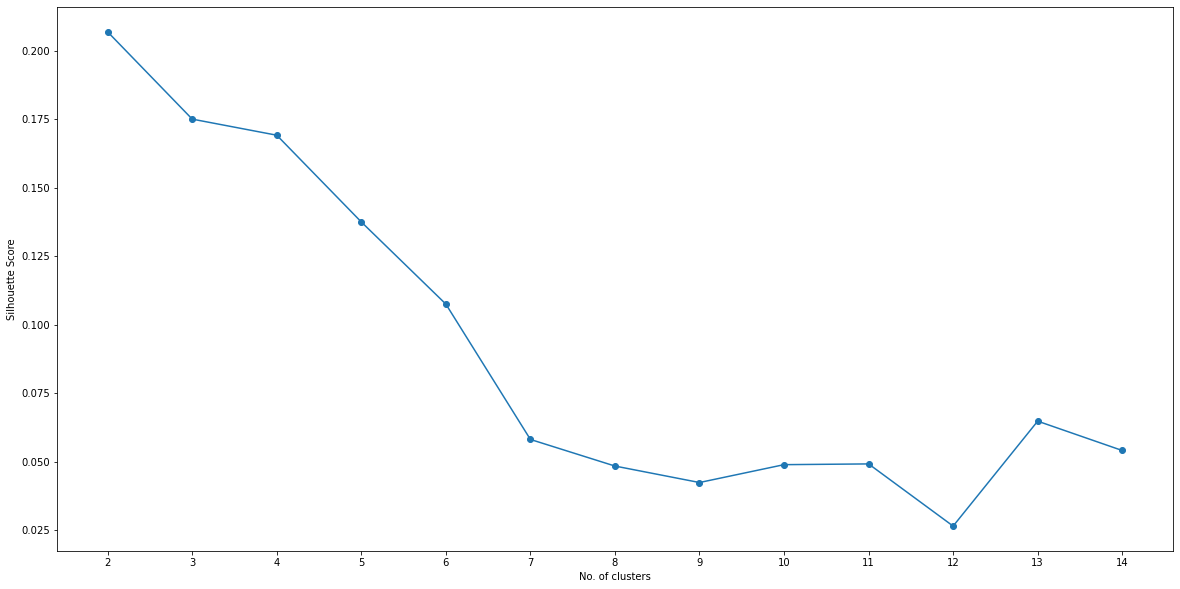

In [31]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

## From the graph the optimal number is found to be 12 using the Elbow Method.

In [33]:
opt_value = 12

## Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering.

In [34]:
waw_clusters = opt_value

# Run k-means clustering
waw_gc = waw_grouped_clustering
kmeans = KMeans(n_clusters = waw_clusters, init = 'k-means++', random_state = 0).fit(waw_gc)

In [35]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

## Now we will crate a final version of dataframe containing all the necessary data.

In [36]:
waw_final = waw_data
waw_final = waw_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
waw_final.dropna(inplace = True)
waw_final['Cluster Labels'] = waw_final['Cluster Labels'].astype(int)
waw_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boernerowo,52.26343,20.90139,6,Bus Station,Airport,Park,Bistro,Basketball Court,Flight School,Pub,Dessert Shop,Event Space,Flea Market
1,Bródno,52.28612,21.03228,4,Bus Station,Pool,Sushi Restaurant,Pharmacy,Park,Dessert Shop,Falafel Restaurant,Burger Joint,Market,Liquor Store
2,Czyste,52.22867,20.97193,8,Japanese Restaurant,Sushi Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place,Lounge,Breakfast Spot,Sandwich Place,Dive Bar,Donut Shop
3,Falenica,52.15590,21.20303,3,Coffee Shop,Indian Restaurant,Italian Restaurant,Train Station,Stadium,Liquor Store,Sushi Restaurant,Yoga Studio,Eastern European Restaurant,Field
4,"Frascati, Warsaw",52.22655,21.02636,7,Cocktail Bar,Park,Vegetarian / Vegan Restaurant,Hotel,Coffee Shop,Sculpture Garden,Restaurant,Clothing Store,Polish Restaurant,Pastry Shop


## In the next step we will visualize the clusters using Folium.

In [59]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(waw_clusters)
ys = [i + x + (i*x)**2 for i in range(waw_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(waw_final['Latitude'], waw_final['Longitude'], waw_final['Neighbourhood'], 
                                  waw_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

## Now lets have a look at all twelve clusters.

In [41]:
val = 1
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Żerań,Bus Station,Harbor / Marina,Gym,Train Station,Market,Tennis Court,Yoga Studio,Drugstore,Field,Fast Food Restaurant


In [43]:
val = 2
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Grochów,Café,Italian Restaurant,Fast Food Restaurant,Burger Joint,Supermarket,Park,Coffee Shop,Diner,Kebab Restaurant,Shopping Mall
9,Kabaty,Café,Pizza Place,Park,Coffee Shop,Ice Cream Shop,Italian Restaurant,Burger Joint,Sushi Restaurant,Playground,Plaza
12,Kolonia Lubeckiego,Café,Italian Restaurant,Pizza Place,Sushi Restaurant,Pool Hall,Science Museum,Seafood Restaurant,Eastern European Restaurant,Park,Korean Restaurant
17,Muranów,Café,Plaza,Coffee Shop,Park,Gym / Fitness Center,Indie Movie Theater,Kebab Restaurant,Mexican Restaurant,Falafel Restaurant,Monument / Landmark
18,Nalewki,Coffee Shop,Café,Bistro,Plaza,Park,Hotel,Beer Bar,Pub,Dessert Shop,Falafel Restaurant
20,Okęcie,Hotel,Turkish Restaurant,Bakery,Hardware Store,Gym / Fitness Center,Electronics Store,Eastern European Restaurant,Pub,Racetrack,Restaurant
24,"Rakowiec, Warsaw",Park,Gym / Fitness Center,Pool,Italian Restaurant,Convenience Store,Coffee Shop,Market,Drugstore,Pub,Beer Bar
26,"Solec, Warsaw",Bar,Park,Cocktail Bar,Restaurant,Coffee Shop,Breakfast Spot,Food Truck,French Restaurant,Frozen Yogurt Shop,Bistro
28,"Ujazdów, Warsaw",Restaurant,Café,Theater,Park,Palace,Historic Site,Music Venue,Radio Station,Eastern European Restaurant,Indie Movie Theater


In [44]:
val = 3
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Gocławek,Fast Food Restaurant,Grocery Store,Plaza,Food Court,Bus Station,Market,Supermarket,Park,Hotel,Water Park


In [45]:
val = 4
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Falenica,Coffee Shop,Indian Restaurant,Italian Restaurant,Train Station,Stadium,Liquor Store,Sushi Restaurant,Yoga Studio,Eastern European Restaurant,Field


In [46]:
val = 5
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bródno,Bus Station,Pool,Sushi Restaurant,Pharmacy,Park,Dessert Shop,Falafel Restaurant,Burger Joint,Market,Liquor Store
23,"Pyry, Warsaw",Bus Station,Hotel,Eastern European Restaurant,Burger Joint,Bus Line,Boarding House,Fast Food Restaurant,Neighborhood,Falafel Restaurant,Tennis Court


In [47]:
val = 6
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Powsin,Park,Convenience Store,Grocery Store,Bus Line,Gas Station,Eastern European Restaurant,Chinese Restaurant,Plaza,Dim Sum Restaurant,Cupcake Shop


In [48]:
val = 7
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boernerowo,Bus Station,Airport,Park,Bistro,Basketball Court,Flight School,Pub,Dessert Shop,Event Space,Flea Market


In [49]:
val = 8
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Frascati, Warsaw",Cocktail Bar,Park,Vegetarian / Vegan Restaurant,Hotel,Coffee Shop,Sculpture Garden,Restaurant,Clothing Store,Polish Restaurant,Pastry Shop
13,Mariensztat,Plaza,Tea Room,Polish Restaurant,Coffee Shop,Cocktail Bar,Hotel,Concert Hall,Beer Bar,Other Great Outdoors,Opera House
15,"Mirów, Warsaw",Hotel,Coffee Shop,Polish Restaurant,Korean Restaurant,Dim Sum Restaurant,Café,Restaurant,Pizza Place,Dance Studio,Eastern European Restaurant
21,"Powiśle, Warsaw",Hotel,Pizza Place,Vegetarian / Vegan Restaurant,Café,Breakfast Spot,Science Museum,Business Center,Road,Polish Restaurant,Planetarium
30,Warsaw Old Town,Plaza,Scenic Lookout,Polish Restaurant,Coffee Shop,Hotel,Lounge,Beer Bar,Other Great Outdoors,Concert Hall,Opera House


In [50]:
val = 9
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Czyste,Japanese Restaurant,Sushi Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place,Lounge,Breakfast Spot,Sandwich Place,Dive Bar,Donut Shop
10,Kamionek,Italian Restaurant,Café,Park,Coffee Shop,Polish Restaurant,Middle Eastern Restaurant,Field,Event Space,Music Venue,Circus
19,Natolin,Indian Restaurant,Park,Café,Beer Bar,Dessert Shop,Coffee Shop,Eastern European Restaurant,Chinese Restaurant,Restaurant,Kebab Restaurant
25,Saska Kępa,Café,Restaurant,Pizza Place,Ice Cream Shop,Dessert Shop,Yoga Studio,Bar,Bulgarian Restaurant,Market,Ramen Restaurant
29,Warsaw New Town,Dessert Shop,Coffee Shop,Greek Restaurant,Breakfast Spot,Chocolate Shop,Shoe Store,Burger Joint,Mediterranean Restaurant,Mexican Restaurant,Café
31,Zbarż,Dessert Shop,Coffee Shop,Greek Restaurant,Breakfast Spot,Chocolate Shop,Shoe Store,Burger Joint,Mediterranean Restaurant,Mexican Restaurant,Café


In [51]:
val = 9
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Czyste,Japanese Restaurant,Sushi Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place,Lounge,Breakfast Spot,Sandwich Place,Dive Bar,Donut Shop
10,Kamionek,Italian Restaurant,Café,Park,Coffee Shop,Polish Restaurant,Middle Eastern Restaurant,Field,Event Space,Music Venue,Circus
19,Natolin,Indian Restaurant,Park,Café,Beer Bar,Dessert Shop,Coffee Shop,Eastern European Restaurant,Chinese Restaurant,Restaurant,Kebab Restaurant
25,Saska Kępa,Café,Restaurant,Pizza Place,Ice Cream Shop,Dessert Shop,Yoga Studio,Bar,Bulgarian Restaurant,Market,Ramen Restaurant
29,Warsaw New Town,Dessert Shop,Coffee Shop,Greek Restaurant,Breakfast Spot,Chocolate Shop,Shoe Store,Burger Joint,Mediterranean Restaurant,Mexican Restaurant,Café
31,Zbarż,Dessert Shop,Coffee Shop,Greek Restaurant,Breakfast Spot,Chocolate Shop,Shoe Store,Burger Joint,Mediterranean Restaurant,Mexican Restaurant,Café


In [52]:
val = 10
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Marymont,Food & Drink Shop,River,Pizza Place,Playground,College Administrative Building,Gym / Fitness Center,Bus Station,Theme Park,Bakery,Café


In [53]:
val = 11
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Henryków, Warsaw",Hotel,Fast Food Restaurant,Bus Station,Train Station,Park,Auto Dealership,Eastern European Restaurant,Flea Market,Field,Farmers Market


In [54]:
val = 12
waw_final.loc[waw_final['Cluster Labels'] == (val - 1), waw_final.columns[[0] + np.arange(4, waw_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Gocław, Warsaw",Supermarket,Sushi Restaurant,Convenience Store,Restaurant,Italian Restaurant,Gym Pool,Park,Coffee Shop,Nightclub,Chinese Restaurant
11,"Koło, Warsaw",Restaurant,Coffee Shop,Gym,Park,Fast Food Restaurant,Supermarket,Dessert Shop,Seafood Restaurant,Breakfast Spot,Shopping Mall
16,"Młynów, Warsaw",Café,Grocery Store,Pizza Place,Chinese Restaurant,Japanese Restaurant,Pub,Cafeteria,Rock Club,Eastern European Restaurant,Cemetery
27,Tarchomin,Shopping Mall,Supermarket,Coffee Shop,Clothing Store,Bus Station,Food & Drink Shop,Bistro,Multiplex,Neighborhood,Burger Joint


## After studying all four clusters, it is recommended to the client that neighbourhoods such as Czyste, Kamionek, Natolin, Saska Kępa that fall in cluster 9 look like good locations for starting a restaurant. The client can go ahead and make a decision depending on other factors like availability and legal requirements that are out of scope of this project.